# 01 - Naive Bayesian - Binary - Lab

===Task===

- Generate a 2 class data using sklearn.
- Put Gaussian Naive Binary Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

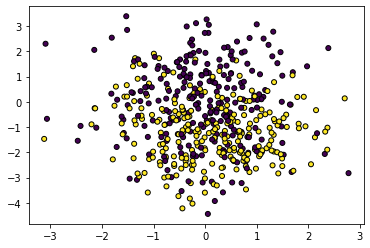

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# generate quite a lot of noise
# with only 4 informative features out of 10
# with 2 redundant features, overlapping with that 4 informative features
# and 4 noisy features
# Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

In [3]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
class MyLoveGaussian:
    def mean_std(self, X_train, y_train):
        n = X_train.shape[1]
        self.mean = np.zeros((2, n))
        self.std = np.zeros((2, n))
        for label in [0, 1]:
            self.mean[label, :] = X_train[y_train==label].mean(axis=0)
            self.std[label, :]  = X_train[y_train==label].std(axis=0)
            
        m0 = len(X_train[y_train==0])
        m1 = len(X_train[y_train==1])
        self.prior0 = m0 / (m0 + m1)
        self.prior1 = m1 / (m0 + m1)

    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def predict(self, X_test):
        #guassian pdf for class 0 and 1
        #Note that I am using X_test, since p(x|y) is looking at "new" evidence
        likelihood0 = self.gaussian_pdf(X_test, self.mean[0, :], self.std[0, :])
        likelihood1 = self.gaussian_pdf(X_test, self.mean[1, :], self.std[0, :])
        
        #pdf should have probability of each sample for each feature
        assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
        assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"

        # np.product
        # P(feature1|class0) * P(feature2|class0)
        total_likelihood0 = np.prod(likelihood0, axis=1)

        # P(feature1|class1) * P(feature2|class1)
        total_likelihood1 = np.prod(likelihood1, axis=1)
        
        # P(class0) * P(feature1|class0) * P(feature2|class0)
        self.posterior0 = self.prior0 * total_likelihood0    
        # P(class1) * P(feature1|class1) * P(feature2|class1)
        self.posterior1 = self.prior1 * total_likelihood1

        #if probability of class 1 is more than 0, then True
        yhat = 1 * self.posterior1 > self.posterior0
        return yhat

model = MyLoveGaussian()
model.mean_std(X_train, y_train)
print(f"mean: {model.mean.shape}")
print(f"std: {model.std.shape}")
assert model.mean.shape == (2, X_train.shape[1])
assert model.std.shape == (2, X_train.shape[1])
yhat = model.predict(X_test)

mean: (2, 10)
std: (2, 10)


In [6]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.78
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.78      0.89      0.83        75
           1       0.88      0.75      0.81        75

    accuracy                           0.82       150
   macro avg       0.83      0.82      0.82       150
weighted avg       0.83      0.82      0.82       150



In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.840392156862745
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.84      0.92      0.88        75
           1       0.91      0.83      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

